In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rbcjswkd","key":"aa237dffa5a457c3097d3ba232a8c80b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        280           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        117           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        365           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2390           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18274            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4724           False  
connectx

In [6]:
! kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           1618  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11            980  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           2062  
Cornell-University/arxiv                               arXiv Dataset                                     888MB  2020-09-22 15:33:49           3040  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          

In [8]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 89% 59.0M/66.0M [00:00<00:00, 79.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 111MB/s] 


In [9]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
card_df.shape

(284807, 31)

In [13]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [20]:
def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)

  X_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]

  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3,
                                                      random_state=0, stratify=y_target)
  return X_train, X_test, y_train, y_test

X_train,  X_test, y_train, y_test = get_train_test_dataset(card_df)

In [21]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

0    99.827451
1     0.172549
Name: Class, dtype: float64
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('정확도: %f, 정밀도: %f, 재현율:%f, F1:%f, AUC:%f' %(accuracy, precision, recall, f1, roc_auc))

In [25]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

정확도: 0.999157, 정밀도: 0.880000, 재현율:0.594595, F1:0.709677, AUC:0.960912


In [30]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [31]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train=y_train, tgt_test=y_test)

정확도: 0.999508, 정밀도: 0.949153, 재현율:0.756757, F1:0.842105, AUC:0.979659


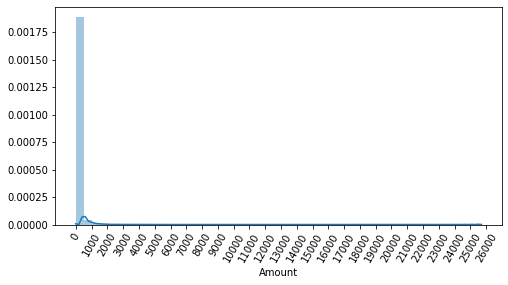

In [32]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [39]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  return df_copy
get_preprocessed_df(card_df).head()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [40]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('# 로지스틱 회귀 예측 성능 #')
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('# LightGBM 예측 성능 #')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

# 로지스틱 회귀 예측 성능 #
정확도: 0.999157, 정밀도: 0.865385, 재현율:0.608108, F1:0.714286, AUC:0.970227
# LightGBM 예측 성능 #
정확도: 0.999508, 정밀도: 0.949153, 재현율:0.756757, F1:0.842105, AUC:0.977290


In [41]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  return df_copy

In [42]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('# 로지스틱 회귀 예측 성능 #')
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('# LightGBM 예측 성능 #')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

# 로지스틱 회귀 예측 성능 #
정확도: 0.999169, 정밀도: 0.881188, 재현율:0.601351, F1:0.714859, AUC:0.972683
# LightGBM 예측 성능 #
정확도: 0.999532, 정밀도: 0.957627, 재현율:0.763514, F1:0.849624, AUC:0.978552


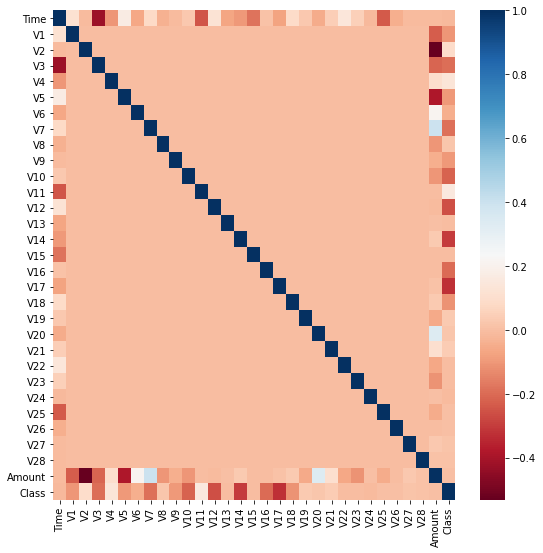

In [44]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [51]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*weight
  lowest_val = quantile_25 - iqr_weight
  highst_val = quantile_75 + iqr_weight

  outlier_index = fraud[(fraud<lowest_val)|(fraud>highst_val)].index

  return outlier_index

In [52]:
np.percentile(card_df['V14'],75)

0.493149849218149

In [53]:
np.percentile(card_df['V14'].values,100)

np.max(card_df['V14'].values)
q_25, q_75 = np.percentile(card_df['V14'],[25,75])
print(q_25, q_75)

-0.4255740124549935 0.493149849218149


In [54]:
outlier_index=get_outlier(card_df, 'V14', 1.5)
print(outlier_index)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [55]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)

  outlier_index = get_outlier(df_copy, 'V14', 1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('# 로지스틱 회귀 예측 성능 #')
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('# LightGBM 예측 성능 #')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)


# 로지스틱 회귀 예측 성능 #
정확도: 0.999274, 정밀도: 0.875000, 재현율:0.671233, F1:0.759690, AUC:0.974272
# LightGBM 예측 성능 #
정확도: 0.999661, 정밀도: 0.968000, 재현율:0.828767, F1:0.892989, AUC:0.983070


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print(X_train.shape, y_train.shape)
print(X_train_over.shape, y_train_over.shape)
print(pd.Series(y_train_over).value_counts())

(199362, 29) (199362,)
(398040, 29) (398040,)
1    199020
0    199020
dtype: int64


In [59]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [60]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

정확도: 0.972273, 정밀도: 0.054152, 재현율:0.924658, F1:0.102311, AUC:0.973654


In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

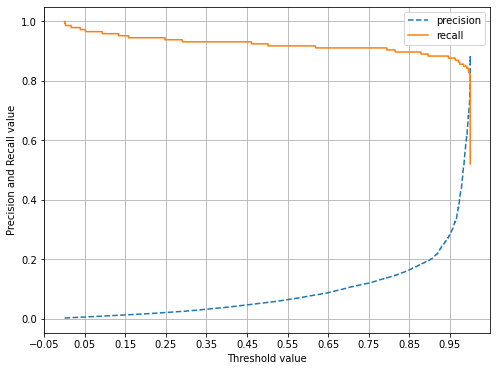

In [66]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [67]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

정확도: 0.999637, 정밀도: 0.932331, 재현율:0.849315, F1:0.888889, AUC:0.978902


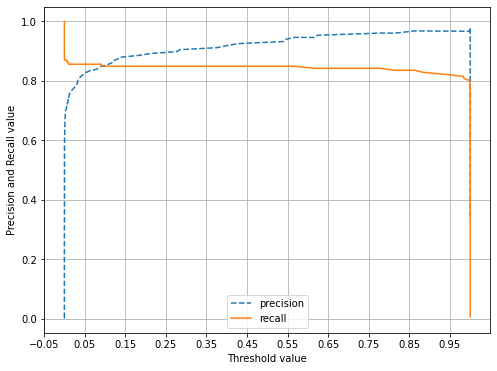

In [68]:
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:,1])

In [77]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.55
lgbm_clf.fit(X_train_over, y_train_over)
pred_proba = lgbm_clf.predict_proba(X_test)

In [78]:
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
print(custom_predict)
get_clf_eval(y_test, custom_predict, pred_proba_1)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
정확도: 0.999661, 정밀도: 0.946565, 재현율:0.849315, F1:0.895307, AUC:0.978902
